<a href="https://colab.research.google.com/github/Luckysolex/Data-Science-Methodologies/blob/master/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# **Time Series Analysis**

Time series: is data that is collected in a specific order over time. The key difference from regular data is that the order matters.

## **Examples:**

* Your weight measured every morning
* The number of customers visiting a store each day
* Stock price at the end of each day
* Number of steps you walk each hour

**Why time series is important?**

You can spot patterns.

Example: you might notice that a store always gets more customers on weekends, Once you see these patterns, you can make predictions "next Saturday will probably be busy too."

**basic components to look out for:**

* Trend — Is it generally going up or down? (Like sales increasing each month)
* Seasonality — Does it repeat regularly? (Like more ice cream sales during festive season)
* Noise — Random ups and downs with no clear pattern

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

`statsmodels` is a library in Python, which is use for statistical modeling, including time series analysis.

In [4]:
df = pd.read_csv("/content/drive/MyDrive/AirPassengers.csv")

In [5]:
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


# **Convert Month to datetime and set as index**

DateTime is a data type used to store both date and time together—day, month, year, hour, minute, and second. It represents a specific moment in time.

In Python (and programming in general), `datetime` is a specialized data type that captures an exact point in time by combining date and time information into a single value.

**Why is datetime important in time series?**

Plots make sense:

* If you keep dates as text, Python won’t know it’s sequential.

* You can’t create proper time-based plots.

Resampling and rolling calculations:

* Example: “Show average passengers per year instead of per month”

* Requires datetime to group by time intervals.

Time-based indexing:

* You can easily select data

Forecasting depends on order:

* Time series models need real sequential dates, not strings, to predict future points.



In [8]:
# Convert month column to datetime module
df["Month"] = pd.to_datetime(df["Month"])

# Set month column as index
df.set_index("Month", inplace=True)

In [9]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


**Plot the series to show trend and seasonality**

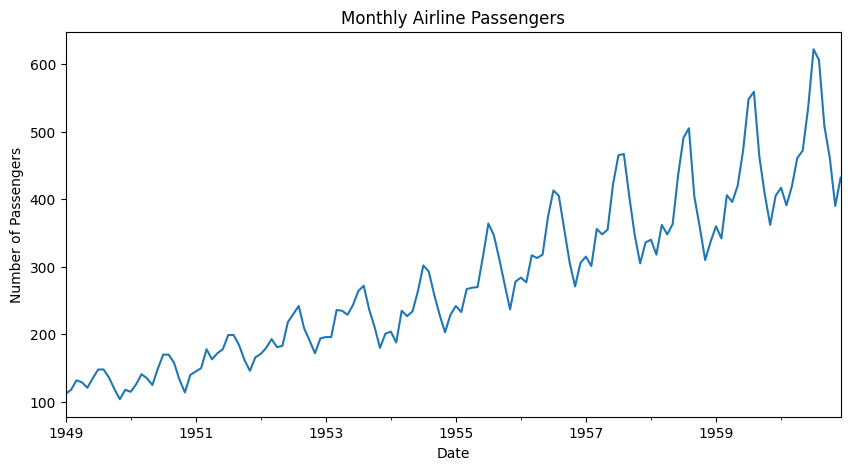

In [12]:
df["#Passengers"].plot(title = "Monthly Airline Passengers", figsize = (10,5))
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.show()

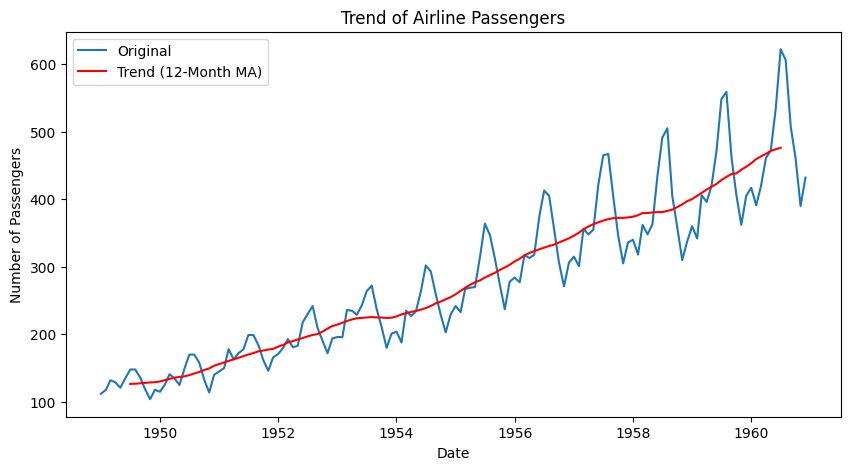

In [14]:
df["Trend"] = df['#Passengers'].rolling(window = 12, center=True).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['#Passengers'], label = "Original")
plt.plot(df['Trend'], label = 'Trend (12-Month MA)', color = 'red')
plt.title("Trend of Airline Passengers")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

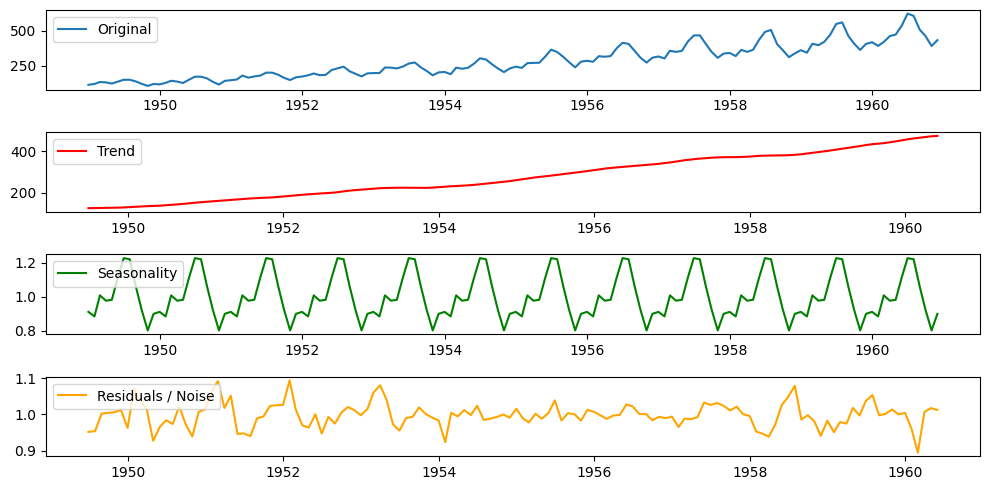

In [15]:
decomposition = seasonal_decompose(df["#Passengers"], model = "multiplicative", period = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 5))

plt.subplot(4,1,1)
plt.plot(df["#Passengers"], label = "Original")
plt.legend(loc = "upper left")

plt.subplot(4,1,2)
plt.plot(trend, label = "Trend", color = 'red')
plt.legend(loc = "upper left")

plt.subplot(4,1,3)
plt.plot(seasonal, label = "Seasonality", color = 'green')
plt.legend(loc = "upper left")

plt.subplot(4,1,4)
plt.plot(residual, label = "Residuals / Noise", color = 'orange')
plt.legend(loc = "upper left")

plt.tight_layout()
plt.show()

##**Stationary and Non-Stationary Time Series**

**Stationary Time Series:**
A stationary time series is one where the data stays relatively stable over time. The pattern doesn't change.

Characteristics:

* No strong upward or downward trend
* No seasonality (repeating patterns)

**Non-Stationary Time Series:**
A non-stationary time series is one where the data changes over time. The pattern is not stable.

Characteristics:

* Has a clear trend (going up or down)
* Has seasonality (repeating patterns)

**Why is this important**

Most forecasting methods (like ARIMA) require stationary data to work properly. If your data is non-stationary, you need to transform it first, remove the trend or seasonality to make it stationary before using those methods.

##**Tests for Stationarity**

**Augmented Dickey-Fuller (ADF) Test** This is the most common test.

**How it works:**

* It checks if the time series has a unit root (a mathematical way of saying "non-stationary")
* It gives you a p-value (a number between 0 and 1)

**interpretation:**

* p-value < 0.05 → Data is stationary (reject the trend)
* p-value ≥ 0.05 → Data is non-stationary (has a trend)

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["#Passengers"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
  print("The series is stationary")
else:
  print("The series is non-stationary")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
The series is non-stationary


In [18]:
print(result)

(np.float64(0.8153688792060498), np.float64(0.991880243437641), 13, 130, {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}, np.float64(996.692930839019))


##**How to Make Data Stationary**

If the time series is non-stationary, We transform the data so its behavior becomes stable over time.

**common methods**

* Differencing

Instead of looking at the actual value, we look at how much it changes from one time step to the next.

* Detrending

Remove the trend line mathematically: dividing the ovseded variable by trend

     df['Detrended_Ratio'] = df['#Passengers'] / df['Trend']


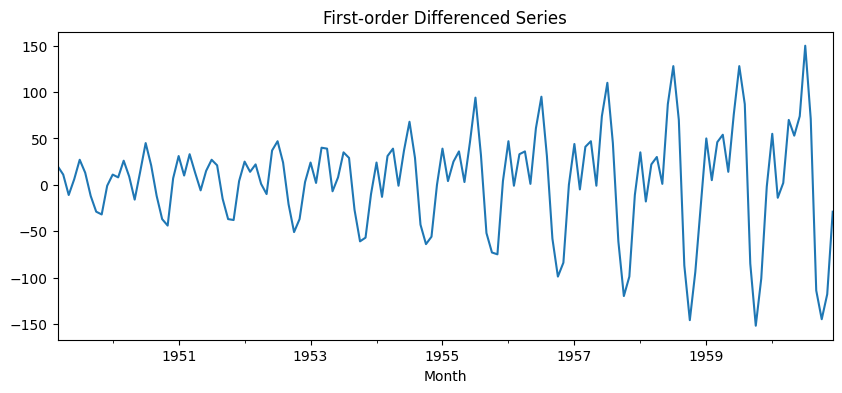

In [19]:
df["Diff_1"] = df["#Passengers"] - df["#Passengers"].shift(2)

# Drop missing values
df_diff = df["Diff_1"].dropna()

df_diff.plot(title = "First-order Differenced Series", figsize = (10, 4))
plt.show()